In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [15]:
#galaxia_data = pd.read_csv("../datos/SDSS-DR14.csv") #importamos conjunto de datos
galaxia_data = pd.read_csv("../datos/SDSS-DR1410_10_2024 5_41_36 AM.csv") #importamos conjunto de datos
galaxia_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237648705131905049,224.367913,0.492218,18.30940,17.13075,16.63043,16.43888,16.33171,752,301,5,540,3731360742641868800,STAR,0.000256,3314,54970,467
1,1237648705131905146,224.469246,0.532670,18.22791,17.03074,16.47815,16.24079,16.09382,752,301,5,540,3731361567275589632,STAR,0.000687,3314,54970,470
2,1237648705131905248,224.379514,0.437444,18.55948,17.31544,16.71859,16.32946,16.09309,752,301,5,540,348053737761171456,GALAXY,0.083711,309,51994,548
3,1237648705131970600,224.502897,0.497601,18.55733,17.24357,16.62276,16.34301,16.20834,752,301,5,541,3731361017519775744,STAR,-0.000022,3314,54970,468
4,1237648705131970604,224.506416,0.568373,17.54774,16.37762,15.95853,15.80821,15.75121,752,301,5,541,3731361842153496576,STAR,-0.000084,3314,54970,471


In [16]:
#Trasladamos la columna de clases al principio de la tabla para simplicidad de datos

cls = galaxia_data[['class']] #extraemos columna "class" para generar variables dummies
galaxia_data1 = galaxia_data.drop(['class'], axis=1) #eliminamos la columna categórica discreta
galaxia_data1 = pd.concat([cls, galaxia_data1],axis=1) #concatenamos data general + columnas binarias
galaxia_data1.head()

,class,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,STAR,1237648705131905049,224.367913,0.492218,18.30940,17.13075,16.63043,16.43888,16.33171,752,301,5,540,3731360742641868800,0.000256,3314,54970,467
1,STAR,1237648705131905146,224.469246,0.532670,18.22791,17.03074,16.47815,16.24079,16.09382,752,301,5,540,3731361567275589632,0.000687,3314,54970,470
2,GALAXY,1237648705131905248,224.379514,0.437444,18.55948,17.31544,16.71859,16.32946,16.09309,752,301,5,540,348053737761171456,0.083711,309,51994,548
3,STAR,1237648705131970600,224.502897,0.497601,18.55733,17.24357,16.62276,16.34301,16.20834,752,301,5,541,3731361017519775744,-0.000022,3314,54970,468
4,STAR,1237648705131970604,224.506416,0.568373,17.54774,16.37762,15.95853,15.80821,15.75121,752,301,5,541,3731361842153496576,-0.000084,3314,54970,471


In [17]:
galaxia_data1.isnull().sum() #verificamos no tener contenidos nulos

class        0
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<Axes: >

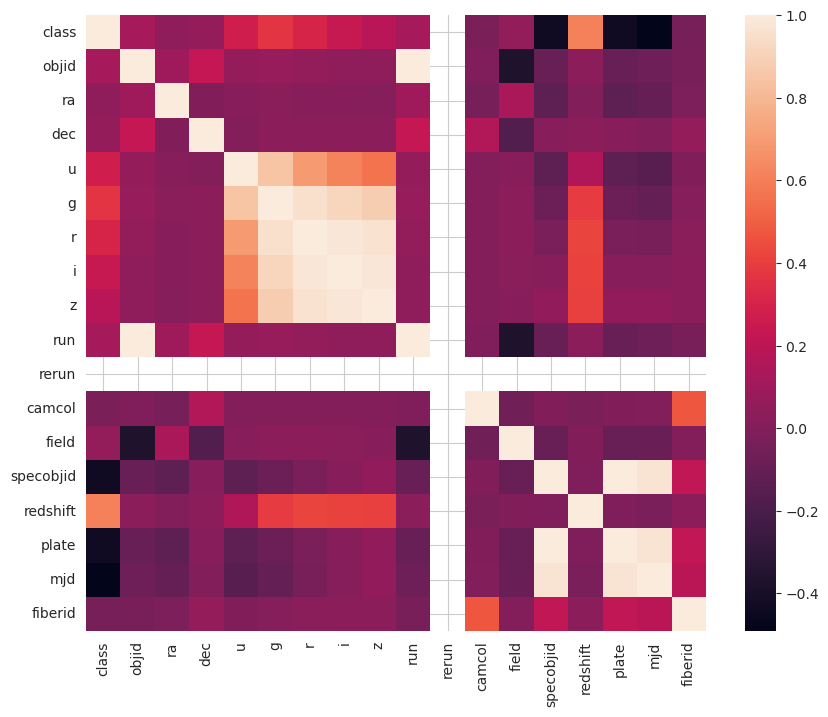

In [18]:
#código solamente para efecto práctico de mapa de calor
df2_test = galaxia_data1[['class']]
df2_cp = galaxia_data1
for n in range(df2_test.shape[0]):
    if df2_test.iloc[n,0] =='STAR':
        df2_test.iloc[n,0] = 1
    elif df2_test.iloc[n,0] =='GALAXY':
        df2_test.iloc[n,0] = 2
    elif df2_test.iloc[n,0] =='QSO':
        df2_test.iloc[n,0] = 3
df2_test.head()

df2_cut = df2_cp.drop(['class'],axis=1)
df2_plot = pd.concat([df2_test,df2_cut],axis=1)
#Print
sb.heatmap(df2_plot.corr())

In [20]:
galaxia_data_clean = galaxia_data1
galaxia_data_clean.info() #verificamos no tener variables no numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      50000 non-null  object 
 1   objid      50000 non-null  int64  
 2   ra         50000 non-null  float64
 3   dec        50000 non-null  float64
 4   u          50000 non-null  float64
 5   g          50000 non-null  float64
 6   r          50000 non-null  float64
 7   i          50000 non-null  float64
 8   z          50000 non-null  float64
 9   run        50000 non-null  int64  
 10  rerun      50000 non-null  int64  
 11  camcol     50000 non-null  int64  
 12  field      50000 non-null  int64  
 13  specobjid  50000 non-null  uint64 
 14  redshift   50000 non-null  float64
 15  plate      50000 non-null  int64  
 16  mjd        50000 non-null  int64  
 17  fiberid    50000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 6.9+ MB


In [21]:
galaxia_data_clean.info() #validamos que todas las variables sean numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      50000 non-null  object 
 1   objid      50000 non-null  int64  
 2   ra         50000 non-null  float64
 3   dec        50000 non-null  float64
 4   u          50000 non-null  float64
 5   g          50000 non-null  float64
 6   r          50000 non-null  float64
 7   i          50000 non-null  float64
 8   z          50000 non-null  float64
 9   run        50000 non-null  int64  
 10  rerun      50000 non-null  int64  
 11  camcol     50000 non-null  int64  
 12  field      50000 non-null  int64  
 13  specobjid  50000 non-null  uint64 
 14  redshift   50000 non-null  float64
 15  plate      50000 non-null  int64  
 16  mjd        50000 non-null  int64  
 17  fiberid    50000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 6.9+ MB


In [22]:
#Separamos las variables categóricas(X) con las descriptivas(y)
X = galaxia_data_clean.iloc[:,1:galaxia_data_clean.shape[1]].values
y = galaxia_data_clean.iloc[:,0].values

In [23]:
y

array(['STAR', 'STAR', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype=object)

In [24]:
#Realizando Entrenamiento a 70% de acierto
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [25]:
from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [26]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[7399   47   78]
 [ 141 1364    0]
 [  45    0 5926]]
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      7524
         QSO       0.97      0.91      0.94      1505
        STAR       0.99      0.99      0.99      5971

    accuracy                           0.98     15000
   macro avg       0.98      0.96      0.97     15000
weighted avg       0.98      0.98      0.98     15000

